In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re


In [2]:
csvPath = './Data/tweetsUS.csv'
header_list = ["Id", "Date", "Lang", "Text"]
tweets = pd.read_csv(csvPath, names=header_list)
tweets.head()

,Id,Date,Lang,Text
0,1227372076505264128,2020-02-11 23:21:21+00:00,en,b'UPDATE: 3-year-old Annabel Wucinski was take...
1,1227670752570347522,2020-02-12 19:08:11+00:00,en,b'Humanity must fight #COVID-19 AS ONE/STOP sa...
2,1228069539751092226,2020-02-13 21:32:49+00:00,en,b'@SenTomCotton For clarity the official name ...
3,1227824948699377664,2020-02-13 05:20:54+00:00,en,b'Interview w/ @CGTNOfficial on difficulties i...
4,1227757079282081793,2020-02-13 00:51:12+00:00,en,b'Coronavirus: Up To 24 Days Before Symptoms S...


In [11]:
start_date = '2020-04-15'
end_date = '2020-04-18'
mask = (tweets['Date'] >= start_date) & (tweets['Date'] <= end_date)
tweets = tweets.loc[mask]

In [ ]:
def CleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    return text

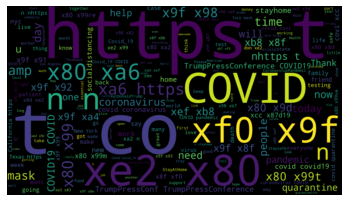

In [15]:
AllWords = ''.join([tweet for tweet in tweets['Text']])
wordCloud = WordCloud(width=1920, height = 1080, random_state=21).generate(AllWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()